<a href="https://colab.research.google.com/github/UncleSamTech/scratch_test_suite/blob/main/metrics_all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal

Load the nltk metrics csv files

In [80]:
df_nltk_10_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_10_projects.csv")
df_nltk_50_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_50_projects.csv")
df_nltk_100_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_100_projects.csv")
df_nltk_150_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_150_projects_main.csv")
df_nltk_500_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_500_projects_main.csv")


convert metrics to list

In [82]:
all_groups_10_proj_accuracy = df_nltk_10_projects['accuracy'].tolist()
all_groups_50_proj_accuracy = df_nltk_50_projects['accuracy'].tolist()
all_groups_100_proj_accuracy = df_nltk_100_projects['accuracy'].tolist()
all_groups_150_proj_accuracy = df_nltk_150_projects['accuracy'].tolist()
all_groups_500_proj_accuracy = df_nltk_500_projects['accuracy'].tolist()
print(type(all_groups_10_proj_accuracy))

<class 'list'>


In [73]:
all_groups_10_proj_precision = df_nltk_10_projects['precision'].tolist()
all_groups_50_proj_precision = df_nltk_50_projects['precision'].tolist()
all_groups_100_proj_precision = df_nltk_100_projects['precision'].tolist()
all_groups_150_proj_precision = df_nltk_150_projects['precision'].tolist()
all_groups_500_proj_precision = df_nltk_500_projects['precision'].tolist()
print(type(all_groups_10_proj_precision))

<class 'list'>


In [74]:
all_groups_10_proj_recall = df_nltk_10_projects['recall'].tolist()
all_groups_50_proj_recall = df_nltk_50_projects['recall'].tolist()
all_groups_100_proj_recall = df_nltk_100_projects['recall'].tolist()
all_groups_150_proj_recall = df_nltk_150_projects['recall'].tolist()
all_groups_500_proj_recall = df_nltk_500_projects['recall'].tolist()
print(type(all_groups_10_proj_recall))

<class 'list'>


In [75]:
all_groups_10_proj_f1score = df_nltk_10_projects['f1score'].tolist()
all_groups_50_proj_f1score = df_nltk_50_projects['f1score'].tolist()
all_groups_100_proj_f1score = df_nltk_100_projects['f1score'].tolist()
all_groups_150_proj_f1score = df_nltk_150_projects['f1score'].tolist()
all_groups_500_proj_f1score = df_nltk_500_projects['f1score'].tolist()
print(type(all_groups_10_proj_f1score))

<class 'list'>


In [83]:


# Perform the Kruskal-Wallis test:
result_accuracy = kruskal(all_groups_10_proj_accuracy, all_groups_50_proj_accuracy, all_groups_100_proj_accuracy, all_groups_150_proj_accuracy, all_groups_500_proj_accuracy)
result_precision = kruskal(all_groups_10_proj_precision, all_groups_50_proj_precision, all_groups_100_proj_precision, all_groups_150_proj_precision, all_groups_500_proj_precision)
result_recall = kruskal(all_groups_10_proj_recall, all_groups_50_proj_recall, all_groups_100_proj_recall, all_groups_150_proj_recall, all_groups_500_proj_recall)
result_f1score = kruskal(all_groups_10_proj_f1score, all_groups_50_proj_f1score, all_groups_100_proj_f1score, all_groups_150_proj_f1score, all_groups_500_proj_f1score)


print("kruskal accuracy",result_accuracy)
print("kruskal precision",result_precision)
print("kruskal recall",result_recall)
print("kruskal f1score",result_f1score)

kruskal accuracy KruskalResult(statistic=8.087906044113412, pvalue=0.08841064326804468)
kruskal precision KruskalResult(statistic=24.8435369121316, pvalue=5.4088413916598704e-05)
kruskal recall KruskalResult(statistic=8.087906044113412, pvalue=0.08841064326804468)
kruskal f1score KruskalResult(statistic=14.000309957189891, pvalue=0.007294066534838598)


  Create a dataframe for all projects sub samples

In [4]:
ngram = list(range(2,7))

In [52]:
all_instances = [32054, 212971, 561321, 719366,885995]

In [5]:
df_accuracy_nltk_all = pd.DataFrame({'10-projects-nltk-accuracy':df_nltk_10_projects['accuracy'],'50-projects-nltk-accuracy':df_nltk_50_projects['accuracy'],'100-projects-nltk-accuracy':df_nltk_100_projects['accuracy'],'150-projects-nltk-accuracy':df_nltk_150_projects['accuracy'],'500-projects-nltk-accuracy':df_nltk_500_projects['accuracy']})
df_precision_nltk_all = pd.DataFrame({'10-projects-nltk':df_nltk_10_projects['precision'],'50-projects-nltk-precision':df_nltk_50_projects['precision'],'100-projects-nltk-precision':df_nltk_100_projects['precision'],'150-projects-nltk-precision':df_nltk_150_projects['precision'],'500-projects-nltk-precision':df_nltk_500_projects['precision']})
df_recall_nltk_all = pd.DataFrame({'10-projects-nltk-recall':df_nltk_10_projects['recall'],'50-projects-nltk-recall':df_nltk_50_projects['recall'],'100-projects-nltk-recall':df_nltk_100_projects['recall'],'150-projects-nltk-recall':df_nltk_150_projects['recall'],'500-projects-nltk-recall':df_nltk_500_projects['recall']})
df_f1score_nltk_all = pd.DataFrame({'10-projects-nltk-f1score':df_nltk_10_projects['f1score'],'50-projects-nltk-f1score':df_nltk_50_projects['f1score'],'100-projects-nltk-f1score':df_nltk_100_projects['f1score'],'150-projects-nltk-f1score':df_nltk_150_projects['f1score'],'500-projects-nltk-f1score':df_nltk_500_projects['f1score']})

In [6]:
df_nltk_10_proj = pd.DataFrame({'ngram':df_nltk_10_projects['ngram'],'accuracy':df_nltk_10_projects['accuracy'],'precision':df_nltk_10_projects['precision'],'recall':df_nltk_10_projects['recall'],'f1score':df_nltk_10_projects['f1score']})
df_nltk_50_proj = pd.DataFrame({'ngram':df_nltk_50_projects['ngram'],'accuracy':df_nltk_50_projects['accuracy'],'precision':df_nltk_50_projects['precision'],'recall':df_nltk_50_projects['recall'],'f1score':df_nltk_50_projects['f1score']})
df_nltk_100_proj = pd.DataFrame({'ngram':df_nltk_100_projects['ngram'],'accuracy':df_nltk_100_projects['accuracy'],'precision':df_nltk_100_projects['precision'],'recall':df_nltk_100_projects['recall'],'f1score':df_nltk_100_projects['f1score']})
df_nltk_150_proj = pd.DataFrame({'ngram':df_nltk_150_projects['ngram'],'accuracy':df_nltk_150_projects['accuracy'],'precision':df_nltk_150_projects['precision'],'recall':df_nltk_150_projects['recall'],'f1score':df_nltk_150_projects['f1score']})
df_nltk_500_proj = pd.DataFrame({'ngram':df_nltk_500_projects['ngram'],'accuracy':df_nltk_500_projects['accuracy'],'precision':df_nltk_500_projects['precision'],'recall':df_nltk_500_projects['recall'],'f1score':df_nltk_500_projects['f1score']})

In [7]:
def compute_avg_per_gram(ngram_order,df_projects,metrics_val):
  filtered_2grams = df_projects[df_projects['ngram'] == ngram_order]
  avg_2grams_acc = (filtered_2grams[metrics_val].sum() / len(filtered_2grams))
  return avg_2grams_acc

In [8]:
all_accuracy_grams_10_projects = [compute_avg_per_gram(i,df_nltk_10_proj,'accuracy') for i in range(2,7)]
all_precision_grams_10_projects = [compute_avg_per_gram(i,df_nltk_10_proj,'precision') for i in range(2,7)]
all_f1score_grams_10_projects = [compute_avg_per_gram(i,df_nltk_10_proj,'f1score') for i in range(2,7)]
all_recall_grams_10_projects = [compute_avg_per_gram(i,df_nltk_10_proj,'recall') for i in range(2,7)]

In [9]:
all_accuracy_grams_50_projects = [compute_avg_per_gram(i,df_nltk_50_proj,'accuracy') for i in range(2,7)]
all_precision_grams_50_projects = [compute_avg_per_gram(i,df_nltk_50_proj,'precision') for i in range(2,7)]
all_f1score_grams_50_projects = [compute_avg_per_gram(i,df_nltk_50_proj,'f1score') for i in range(2,7)]
all_recall_grams_50_projects = [compute_avg_per_gram(i,df_nltk_50_proj,'recall') for i in range(2,7)]

In [10]:
all_accuracy_grams_100_projects = [compute_avg_per_gram(i,df_nltk_100_proj,'accuracy') for i in range(2,7)]
all_precision_grams_100_projects = [compute_avg_per_gram(i,df_nltk_100_proj,'precision') for i in range(2,7)]
all_f1score_grams_100_projects = [compute_avg_per_gram(i,df_nltk_100_proj,'f1score') for i in range(2,7)]
all_recall_grams_100_projects = [compute_avg_per_gram(i,df_nltk_100_proj,'recall') for i in range(2,7)]

In [11]:
all_accuracy_grams_150_projects = [compute_avg_per_gram(i,df_nltk_150_proj,'accuracy') for i in range(2,7)]
all_precision_grams_150_projects = [compute_avg_per_gram(i,df_nltk_150_proj,'precision') for i in range(2,7)]
all_f1score_grams_150_projects = [compute_avg_per_gram(i,df_nltk_150_proj,'f1score') for i in range(2,7)]
all_recall_grams_150_projects = [compute_avg_per_gram(i,df_nltk_150_proj,'recall') for i in range(2,7)]

In [12]:
all_accuracy_grams_500_projects = [compute_avg_per_gram(i,df_nltk_500_proj,'accuracy') for i in range(2,7)]
all_precision_grams_500_projects = [compute_avg_per_gram(i,df_nltk_500_proj,'precision') for i in range(2,7)]
all_f1score_grams_500_projects = [compute_avg_per_gram(i,df_nltk_500_proj,'f1score') for i in range(2,7)]
all_recall_grams_500_projects = [compute_avg_per_gram(i,df_nltk_500_proj,'recall') for i in range(2,7)]

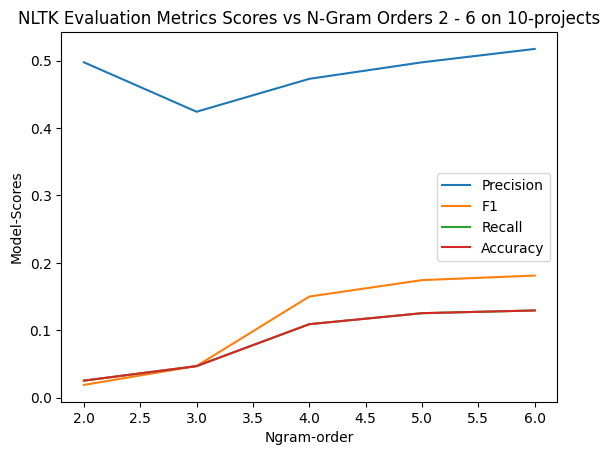

In [89]:
plt.plot(ngram, all_precision_grams_10_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_10_projects, label = "F1")
plt.plot(ngram, all_recall_grams_10_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_10_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 10-projects')
plt.legend()
plt.savefig(f"/content/plot_results/nltk_10_projects_avg_eval_metrics_2_6.pdf")
plt.show()

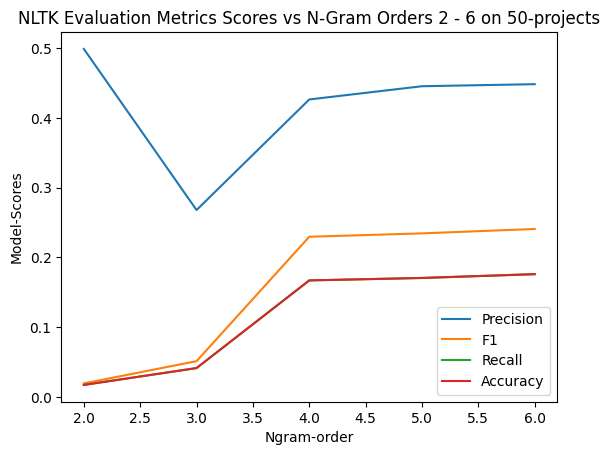

In [90]:
plt.plot(ngram, all_precision_grams_50_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_50_projects, label = "F1")
plt.plot(ngram, all_recall_grams_50_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_50_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 50-projects')
plt.legend()
plt.savefig(f"/content/plot_results/nltk_50_projects_avg_eval_metrics_2_6.pdf")
plt.show()

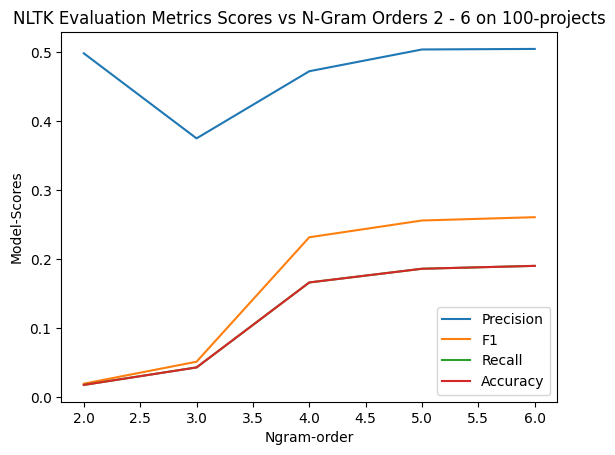

In [91]:
plt.plot(ngram, all_precision_grams_100_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_100_projects, label = "F1")
plt.plot(ngram, all_recall_grams_100_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_100_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 100-projects')
plt.legend()
plt.savefig(f"/content/plot_results/nltk_100_projects_avg_eval_metrics_2_6.pdf")
plt.show()

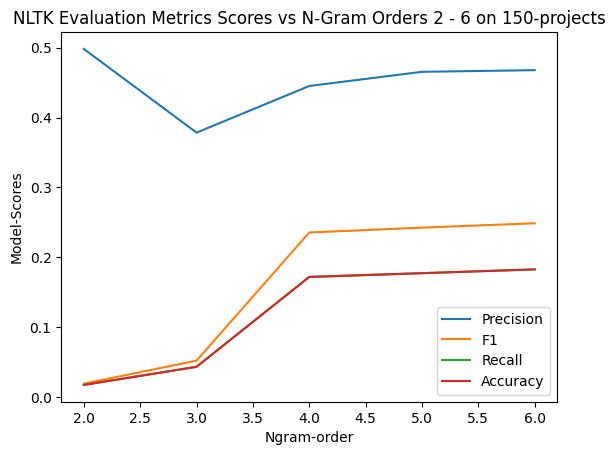

In [92]:
plt.plot(ngram, all_precision_grams_150_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_150_projects, label = "F1")
plt.plot(ngram, all_recall_grams_150_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_150_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 150-projects')
plt.legend()
plt.savefig(f"/content/plot_results/nltk_150_projects_avg_eval_metrics_2_6.pdf")
plt.show()

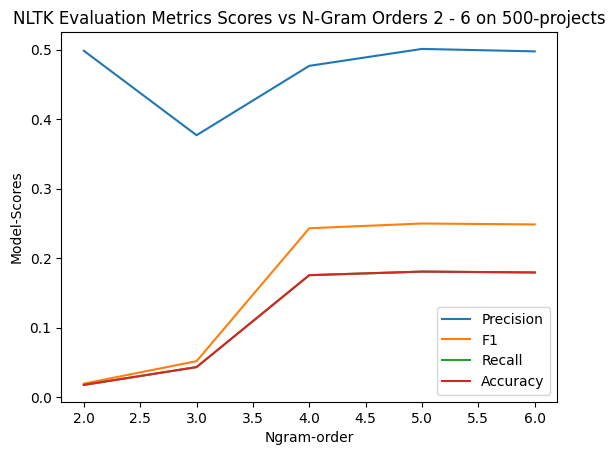

In [93]:
plt.plot(ngram, all_precision_grams_500_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_500_projects, label = "F1")
plt.plot(ngram, all_recall_grams_500_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_500_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 500-projects')
plt.legend()
plt.savefig(f"/content/plot_results/nltk_500_projects_avg_eval_metrics_2_6.pdf")
plt.show()

Plot boxplot for all subsamples accuracy

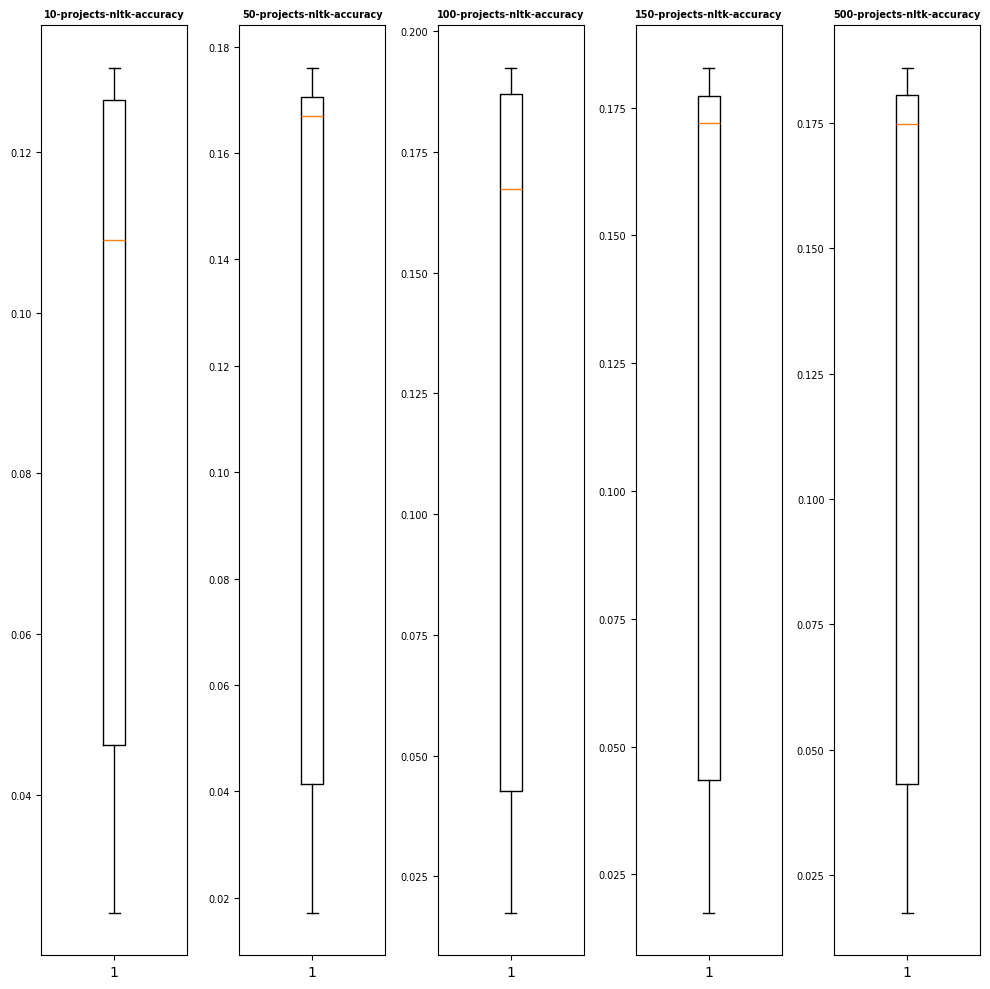

In [18]:
red_circle = dict(markerfacecolor='red',marker='o',markeredgecolor='white')

fig,axis = plt.subplots(1,len(df_accuracy_nltk_all.columns),figsize=(10,10))
for i,ax in enumerate(axis.flat):
  ax.boxplot(df_accuracy_nltk_all.iloc[:,i],flierprops=red_circle)
  ax.set_title(df_accuracy_nltk_all.columns[i],fontsize=7,fontweight='bold')
  ax.tick_params(axis='y',labelsize=7)


plt.tight_layout()
plt.savefig("/content/plot_results/nltk_accuracy_boxplot.pdf")
#plt.title("Accuracy Data Distribution vs Sub Sampled Projects across 5 runs")

Instances vs Accuracy

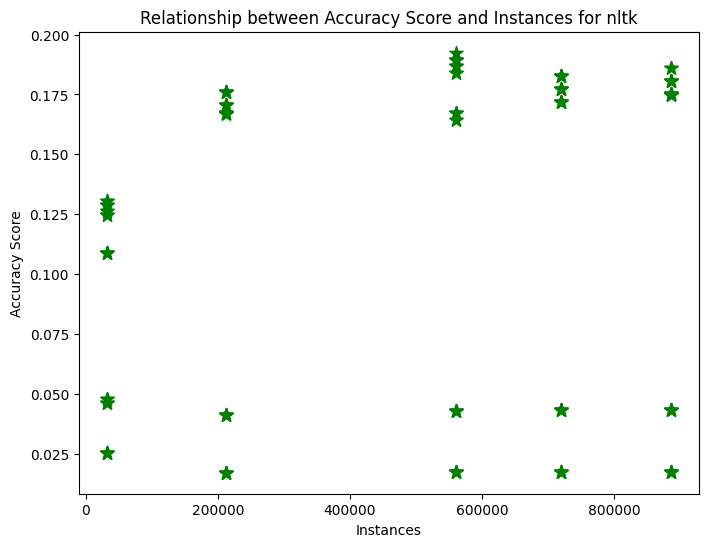

In [20]:

# Data for recall score and instances
accuracy_data = [
    df_nltk_10_projects['accuracy'],
    df_nltk_50_projects['accuracy'],
    df_nltk_100_projects['accuracy'],
    df_nltk_150_projects['accuracy'],
    df_nltk_500_projects['accuracy']
]

# Corresponding instance counts, repeated 25 times to match the length of each recall data set
instances = [32054] * 25 + [212971] * 25 + [561321] * 25 + [719366] * 25 + [885995] * 25

# Flatten recall_data list to get all data points in a single list
recall_scores = [score for dataset in accuracy_data for score in dataset]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(instances,recall_scores,color='green', marker='*', s=100)  # s=100 for marker size

# Labels and title
plt.xlabel("Instances")
plt.ylabel("Accuracy Score")
plt.title("Relationship between Accuracy Score and Instances for nltk")

# Save as PDF
plt.savefig("/content/plot_results/accuracy_score_vs_instances_plot_nltk.pdf")
plt.show()

KenLM Section

extract in required csv format

In [27]:
df_kenlm_10_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_10_pro.csv")
df_kenlm_50_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_50_pro.csv")
df_kenlm_100_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_100_pro.csv")
df_kenlm_150_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_150_pro.csv")
df_kenlm_500_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_500_pro.csv")


In [94]:
kenlm_all_groups_10_proj_accuracy = df_kenlm_10_projects['accuracy'].tolist()
kenlm_all_groups_50_proj_accuracy = df_kenlm_50_projects['accuracy'].tolist()
kenlm_all_groups_100_proj_accuracy = df_kenlm_100_projects['accuracy'].tolist()
kenlm_all_groups_150_proj_accuracy = df_kenlm_150_projects['accuracy'].tolist()
kenlm_all_groups_500_proj_accuracy = df_kenlm_500_projects['accuracy'].tolist()
print(type(kenlm_all_groups_10_proj_accuracy))

<class 'list'>


In [96]:
kenlm_all_groups_10_proj_precision = df_kenlm_10_projects['precision'].tolist()
kenlm_all_groups_50_proj_precision = df_kenlm_50_projects['precision'].tolist()
kenlm_all_groups_100_proj_precision = df_kenlm_100_projects['precision'].tolist()
kenlm_all_groups_150_proj_precision = df_kenlm_150_projects['precision'].tolist()
kenlm_all_groups_500_proj_precision = df_kenlm_500_projects['precision'].tolist()
print(type(kenlm_all_groups_10_proj_precision))

<class 'list'>


In [97]:
kenlm_all_groups_10_proj_recall = df_kenlm_10_projects['recall'].tolist()
kenlm_all_groups_50_proj_recall = df_kenlm_50_projects['recall'].tolist()
kenlm_all_groups_100_proj_recall = df_kenlm_100_projects['recall'].tolist()
kenlm_all_groups_150_proj_recall = df_kenlm_150_projects['recall'].tolist()
kenlm_all_groups_500_proj_recall = df_kenlm_500_projects['recall'].tolist()
print(type(kenlm_all_groups_10_proj_recall))

<class 'list'>


In [98]:
kenlm_all_groups_10_proj_f1score = df_kenlm_10_projects['f1score'].tolist()
kenlm_all_groups_50_proj_f1score = df_kenlm_50_projects['f1score'].tolist()
kenlm_all_groups_100_proj_f1score = df_kenlm_100_projects['f1score'].tolist()
kenlm_all_groups_150_proj_f1score = df_kenlm_150_projects['f1score'].tolist()
kenlm_all_groups_500_proj_f1score = df_kenlm_500_projects['f1score'].tolist()
print(type(kenlm_all_groups_10_proj_f1score))

<class 'list'>


In [100]:


# Perform the Kruskal-Wallis test on KenLM:
kenlm_result_accuracy = kruskal(kenlm_all_groups_10_proj_accuracy, kenlm_all_groups_50_proj_accuracy, kenlm_all_groups_100_proj_accuracy, kenlm_all_groups_150_proj_accuracy, kenlm_all_groups_500_proj_accuracy)
kenlm_result_precision = kruskal(kenlm_all_groups_10_proj_precision, kenlm_all_groups_50_proj_precision, kenlm_all_groups_100_proj_precision, kenlm_all_groups_150_proj_precision, kenlm_all_groups_500_proj_precision)
kenlm_result_recall = kruskal(kenlm_all_groups_10_proj_recall, kenlm_all_groups_50_proj_recall, kenlm_all_groups_100_proj_recall, kenlm_all_groups_150_proj_recall, kenlm_all_groups_500_proj_recall)
kenlm_result_f1score = kruskal(kenlm_all_groups_10_proj_f1score, kenlm_all_groups_50_proj_f1score, kenlm_all_groups_100_proj_f1score, kenlm_all_groups_150_proj_f1score, kenlm_all_groups_500_proj_f1score)


print("kruskal accuracy",kenlm_result_accuracy)
print("kruskal precision",kenlm_result_precision)
print("kruskal recall",kenlm_result_recall)
print("kruskal f1score",kenlm_result_f1score)

kruskal accuracy KruskalResult(statistic=54.52184615384615, pvalue=4.091832797633965e-11)
kruskal precision KruskalResult(statistic=55.593241186328626, pvalue=2.4401840566465026e-11)
kruskal recall KruskalResult(statistic=54.5201686101966, pvalue=4.095144805766655e-11)
kruskal f1score KruskalResult(statistic=84.54051460887696, pvalue=1.898672157093808e-17)


In [28]:
print(df_kenlm_10_projects)

    run  ngram          vocab_file         model_name  accuracy  precision  \
0     1      2  kenln_order2.vocab  kenln_order2.arpa  0.452000   0.505116   
1     2      2  kenln_order2.vocab  kenln_order2.arpa  0.452000   0.505116   
2     3      2  kenln_order2.vocab  kenln_order2.arpa  0.452000   0.505116   
3     4      2  kenln_order2.vocab  kenln_order2.arpa  0.452000   0.505116   
4     5      2  kenln_order2.vocab  kenln_order2.arpa  0.452000   0.505116   
5     1      3  kenln_order3.vocab  kenln_order3.arpa  0.413258   0.513384   
6     2      3  kenln_order3.vocab  kenln_order3.arpa  0.413258   0.513384   
7     3      3  kenln_order3.vocab  kenln_order3.arpa  0.413258   0.513384   
8     4      3  kenln_order3.vocab  kenln_order3.arpa  0.413258   0.513384   
9     5      3  kenln_order3.vocab  kenln_order3.arpa  0.413258   0.513384   
10    1      4  kenln_order4.vocab  kenln_order4.arpa  0.406488   0.521675   
11    2      4  kenln_order4.vocab  kenln_order4.arpa  0.406488 

In [29]:
df_accuracy_kenlm_all = pd.DataFrame({'10-projects-kenlm-accuracy':df_kenlm_10_projects['accuracy'],'50-projects-kenlm-accuracy':df_kenlm_50_projects['accuracy'],'100-projects-kenlm-accuracy':df_kenlm_100_projects['accuracy'],'150-projects-kenlm-accuracy':df_kenlm_150_projects['accuracy'],'500-projects-kenlm-accuracy':df_kenlm_500_projects['accuracy']})
df_precision_kenlm_all = pd.DataFrame({'10-projects-kenlm-precision':df_kenlm_10_projects['precision'],'50-projects-kenlm-precision':df_kenlm_50_projects['precision'],'100-projects-kenlm-precision':df_kenlm_100_projects['precision'],'150-projects-kenlm-precision':df_kenlm_150_projects['precision'],'500-projects-kenlm-precision':df_kenlm_500_projects['precision']})
df_recall_kenlm_all = pd.DataFrame({'10-projects-kenlm-recall':df_kenlm_10_projects['recall'],'50-projects-kenlm-recall':df_kenlm_50_projects['recall'],'100-projects-kenlm-recall':df_kenlm_100_projects['recall'],'150-projects-kenlm-recall':df_kenlm_150_projects['recall'],'500-projects-kenlm-recall':df_kenlm_500_projects['recall']})
df_f1score_kenlm_all = pd.DataFrame({'10-projects-kenlm-f1score':df_kenlm_10_projects['f1score'],'50-projects-kenlm-f1score':df_kenlm_50_projects['f1score'],'100-projects-kenlm-f1score':df_kenlm_100_projects['f1score'],'150-projects-kenlm-f1score':df_kenlm_150_projects['f1score'],'500-projects-kenlm-f1score':df_kenlm_500_projects['f1score']})

In [30]:
print(df_accuracy_kenlm_all)

    10-projects-kenlm-accuracy  50-projects-kenlm-accuracy  \
0                     0.452000                    0.482690   
1                     0.452000                    0.482690   
2                     0.452000                    0.482690   
3                     0.452000                    0.482690   
4                     0.452000                    0.482690   
5                     0.413258                    0.451210   
6                     0.413258                    0.451210   
7                     0.413258                    0.451210   
8                     0.413258                    0.451210   
9                     0.413258                    0.451210   
10                    0.406488                    0.449587   
11                    0.406488                    0.449587   
12                    0.406488                    0.449587   
13                    0.406488                    0.449587   
14                    0.406488                    0.449587   
15      

In [31]:
df_kenlm_10_proj = pd.DataFrame({'ngram':df_kenlm_10_projects['ngram'],'accuracy':df_kenlm_10_projects['accuracy'],'precision':df_kenlm_10_projects['precision'],'recall':df_kenlm_10_projects['recall'],'f1score':df_kenlm_10_projects['f1score']})
df_kenlm_50_proj = pd.DataFrame({'ngram':df_kenlm_50_projects['ngram'],'accuracy':df_kenlm_50_projects['accuracy'],'precision':df_kenlm_50_projects['precision'],'recall':df_kenlm_50_projects['recall'],'f1score':df_kenlm_50_projects['f1score']})
df_kenlm_100_proj = pd.DataFrame({'ngram':df_kenlm_100_projects['ngram'],'accuracy':df_kenlm_100_projects['accuracy'],'precision':df_kenlm_100_projects['precision'],'recall':df_kenlm_100_projects['recall'],'f1score':df_kenlm_100_projects['f1score']})
df_kenlm_150_proj = pd.DataFrame({'ngram':df_kenlm_150_projects['ngram'],'accuracy':df_kenlm_150_projects['accuracy'],'precision':df_kenlm_150_projects['precision'],'recall':df_kenlm_150_projects['recall'],'f1score':df_kenlm_150_projects['f1score']})
df_kenlm_500_proj = pd.DataFrame({'ngram':df_kenlm_500_projects['ngram'],'accuracy':df_kenlm_500_projects['accuracy'],'precision':df_kenlm_500_projects['precision'],'recall':df_kenlm_500_projects['recall'],'f1score':df_kenlm_500_projects['f1score']})

In [32]:
all_accuracy_kenlm_10_projects = [compute_avg_per_gram(i,df_kenlm_10_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_10_projects = [compute_avg_per_gram(i,df_kenlm_10_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_10_projects = [compute_avg_per_gram(i,df_kenlm_10_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_10_projects = [compute_avg_per_gram(i,df_kenlm_10_proj,'recall') for i in range(2,7)]

In [33]:
all_accuracy_kenlm_50_projects = [compute_avg_per_gram(i,df_kenlm_50_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_50_projects = [compute_avg_per_gram(i,df_kenlm_50_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_50_projects = [compute_avg_per_gram(i,df_kenlm_50_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_50_projects = [compute_avg_per_gram(i,df_kenlm_50_proj,'recall') for i in range(2,7)]

In [34]:
all_accuracy_kenlm_100_projects = [compute_avg_per_gram(i,df_kenlm_100_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_100_projects = [compute_avg_per_gram(i,df_kenlm_100_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_100_projects = [compute_avg_per_gram(i,df_kenlm_100_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_100_projects = [compute_avg_per_gram(i,df_kenlm_100_proj,'recall') for i in range(2,7)]

In [35]:
all_accuracy_kenlm_150_projects = [compute_avg_per_gram(i,df_kenlm_150_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_150_projects = [compute_avg_per_gram(i,df_kenlm_150_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_150_projects = [compute_avg_per_gram(i,df_kenlm_150_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_150_projects = [compute_avg_per_gram(i,df_kenlm_150_proj,'recall') for i in range(2,7)]

In [36]:
all_accuracy_kenlm_500_projects = [compute_avg_per_gram(i,df_kenlm_500_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_500_projects = [compute_avg_per_gram(i,df_kenlm_500_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_500_projects = [compute_avg_per_gram(i,df_kenlm_500_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_500_projects = [compute_avg_per_gram(i,df_kenlm_500_proj,'recall') for i in range(2,7)]

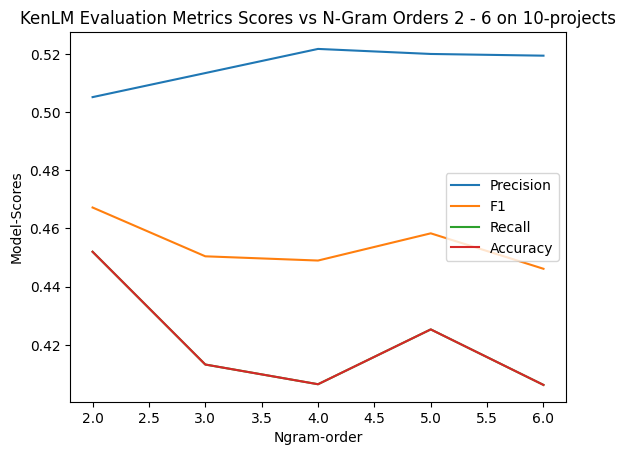

In [84]:
plt.plot(ngram, all_precision_kenlm_10_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_10_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_10_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_10_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 10-projects')
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_10_projects_avg_eval_metrics_2_6.pdf")
plt.show()

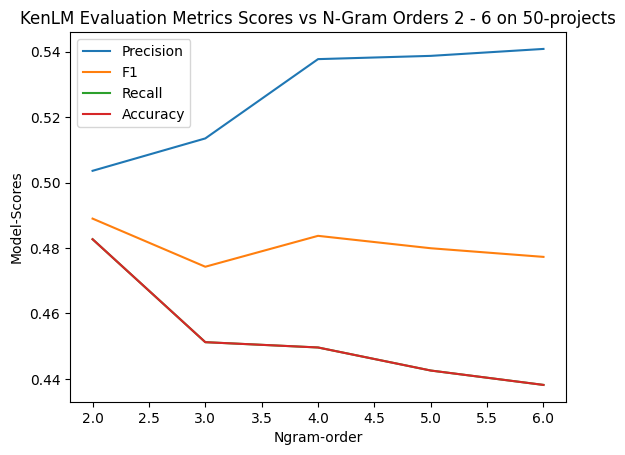

In [85]:
plt.plot(ngram, all_precision_kenlm_50_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_50_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_50_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_50_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 50-projects')
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_50_projects_avg_eval_metrics_2_6.pdf")
plt.show()

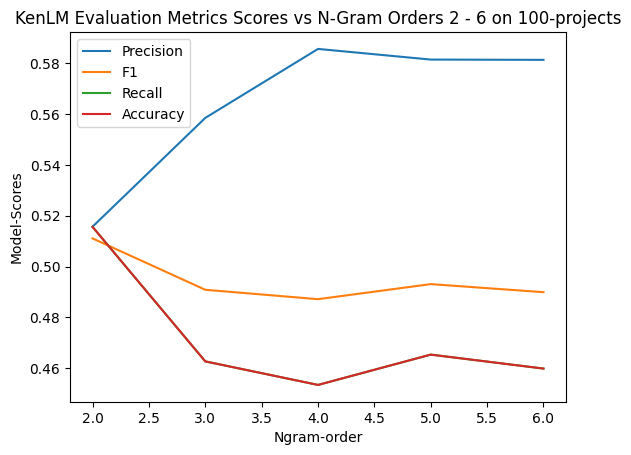

In [86]:
plt.plot(ngram, all_precision_kenlm_100_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_100_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_100_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_100_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 100-projects')
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_100_projects_avg_eval_metrics_2_6.pdf")
plt.show()

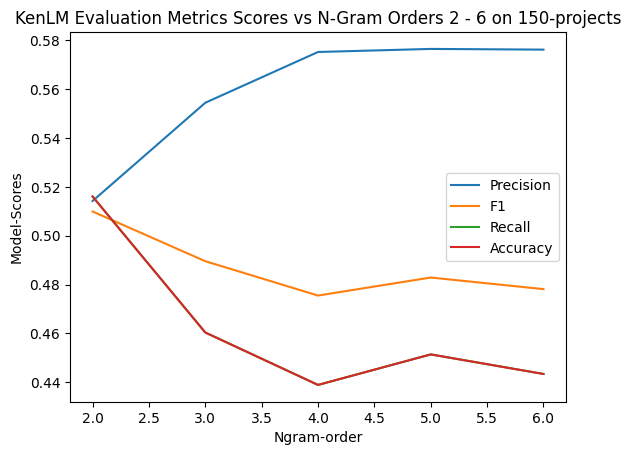

In [87]:
plt.plot(ngram, all_precision_kenlm_150_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_150_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_150_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_150_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 150-projects')
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_150_projects_avg_eval_metrics_2_6.pdf")
plt.show()

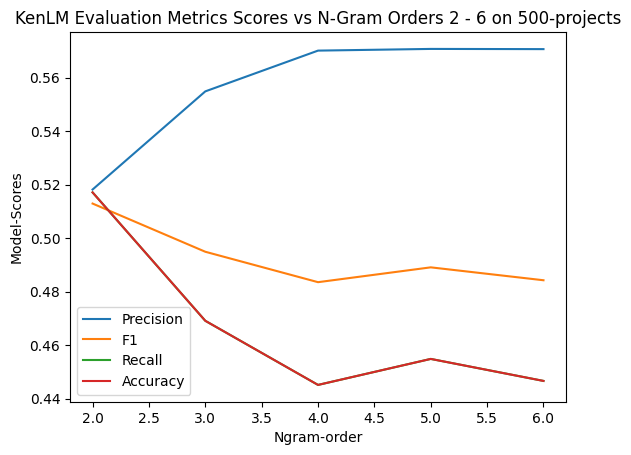

In [88]:
plt.plot(ngram, all_precision_kenlm_500_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_500_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_500_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_500_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 500-projects')
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_500_projects_avg_eval_metrics_2_6.pdf")
plt.show()

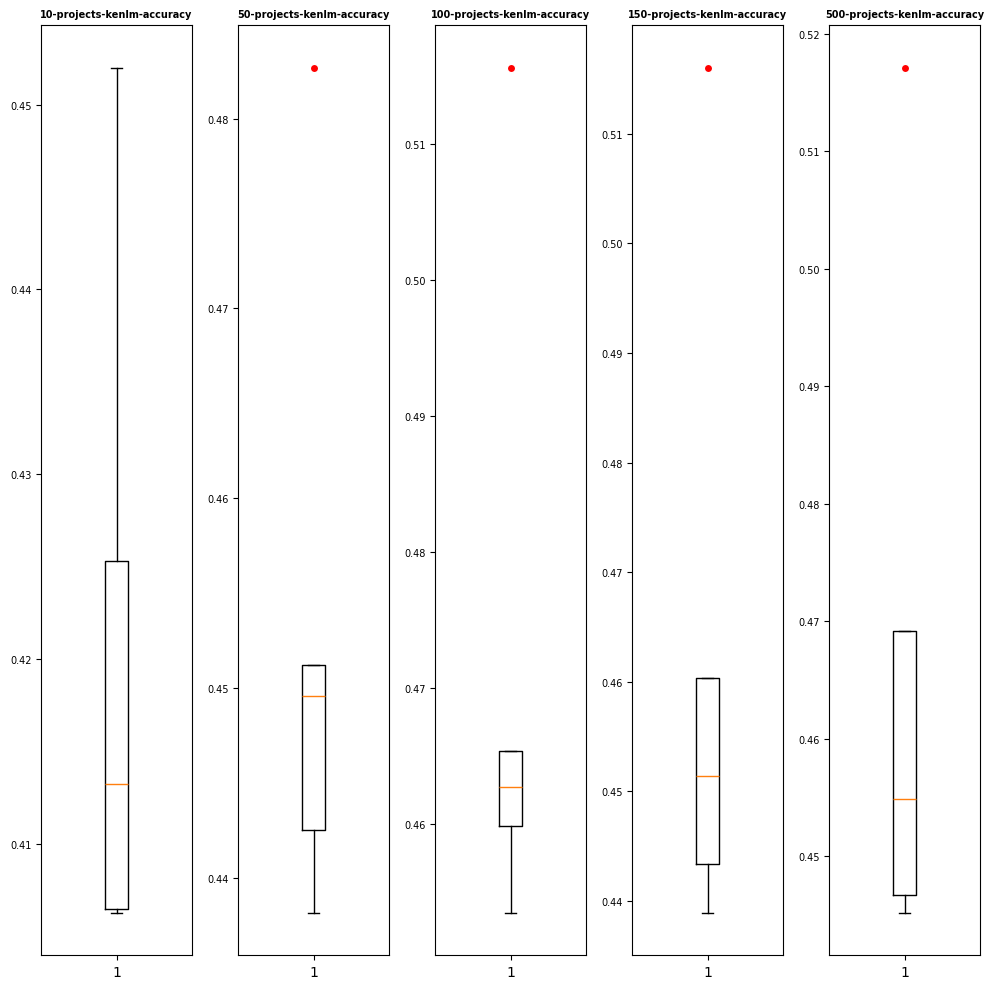

In [42]:
red_circle = dict(markerfacecolor='red',marker='o',markeredgecolor='white')

fig,axis = plt.subplots(1,len(df_accuracy_kenlm_all.columns),figsize=(10,10))
for i,ax in enumerate(axis.flat):
  ax.boxplot(df_accuracy_kenlm_all.iloc[:,i],flierprops=red_circle)
  ax.set_title(df_accuracy_kenlm_all.columns[i],fontsize=7,fontweight='bold')
  ax.tick_params(axis='y',labelsize=7)


plt.tight_layout()
plt.savefig("/content/plot_results/kenlm_accuracy_boxplot.pdf")
#plt.title("Accuracy Data Distribution vs Sub Sampled Projects across 5 runs")

Normalized plot

In [43]:
scaler = MinMaxScaler()

In [44]:
df_accuracy_normalized_kenlm = pd.DataFrame(scaler.fit_transform(df_accuracy_kenlm_all), columns=df_accuracy_kenlm_all.columns)

In [47]:
df_accuracy_normalized_nltk = pd.DataFrame(scaler.fit_transform(df_accuracy_nltk_all), columns=df_accuracy_nltk_all.columns)

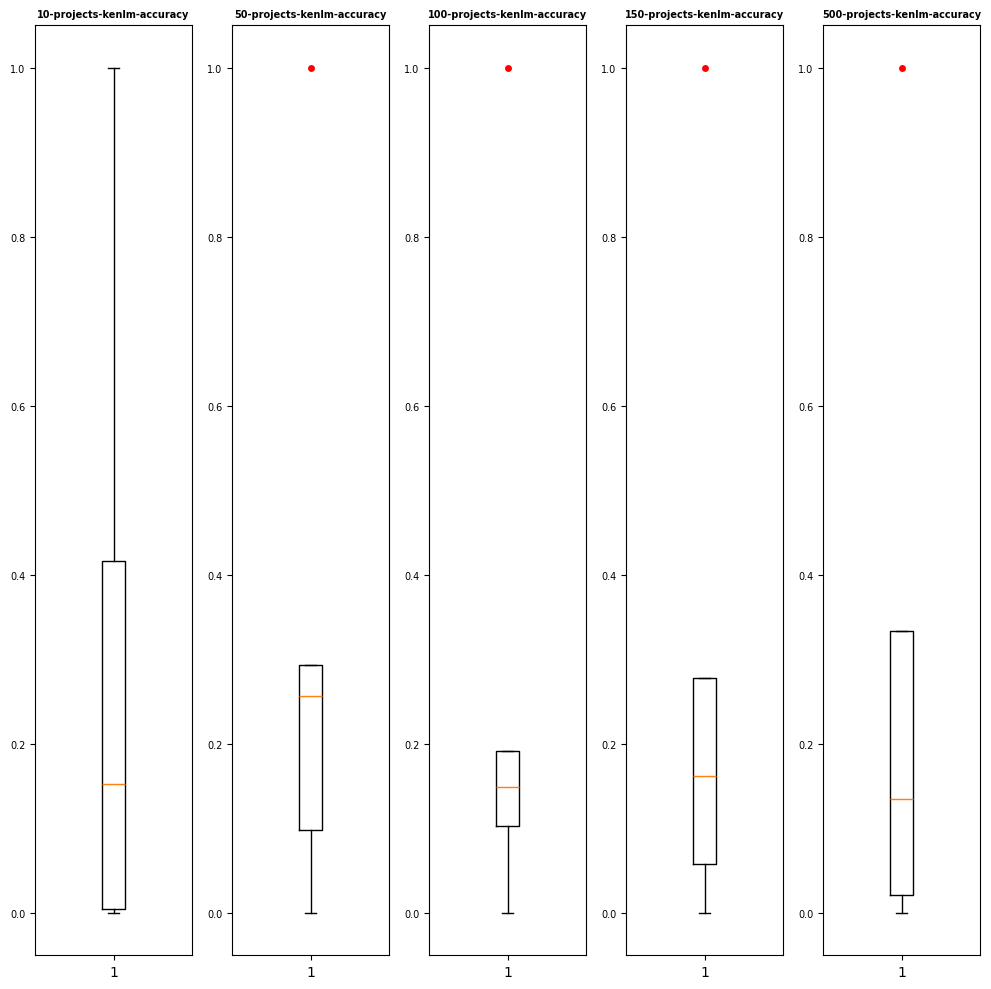

In [45]:
red_circle = dict(markerfacecolor='red',marker='o',markeredgecolor='white')

fig,axis = plt.subplots(1,len(df_accuracy_normalized_kenlm.columns),figsize=(10,10))
for i,ax in enumerate(axis.flat):
  ax.boxplot(df_accuracy_normalized_kenlm.iloc[:,i],flierprops=red_circle)
  ax.set_title(df_accuracy_normalized_kenlm.columns[i],fontsize=7,fontweight='bold')
  ax.tick_params(axis='y',labelsize=7)


plt.tight_layout()
plt.savefig("/content/plot_results/kenlm_accuracy_boxplot_normalized.pdf")
#plt.title("Accuracy Data Distribution vs Sub Sampled Projects across 5 runs")

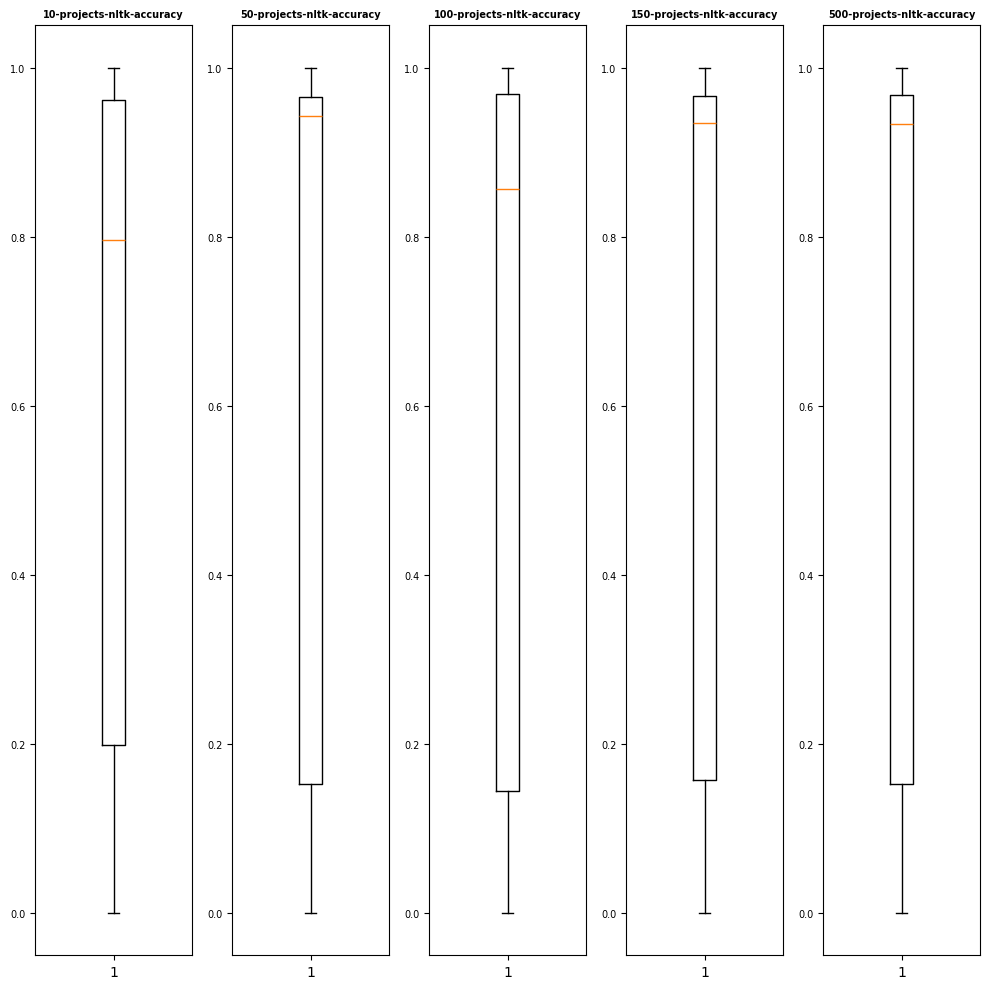

In [48]:
red_circle = dict(markerfacecolor='red',marker='o',markeredgecolor='white')

fig,axis = plt.subplots(1,len(df_accuracy_normalized_nltk.columns),figsize=(10,10))
for i,ax in enumerate(axis.flat):
  ax.boxplot(df_accuracy_normalized_nltk.iloc[:,i],flierprops=red_circle)
  ax.set_title(df_accuracy_normalized_nltk.columns[i],fontsize=7,fontweight='bold')
  ax.tick_params(axis='y',labelsize=7)


plt.tight_layout()
plt.savefig("/content/plot_results/nltk_accuracy_boxplot_normalized.pdf")
#plt.title("Accuracy Data Distribution vs Sub Sampled Projects across 5 runs")

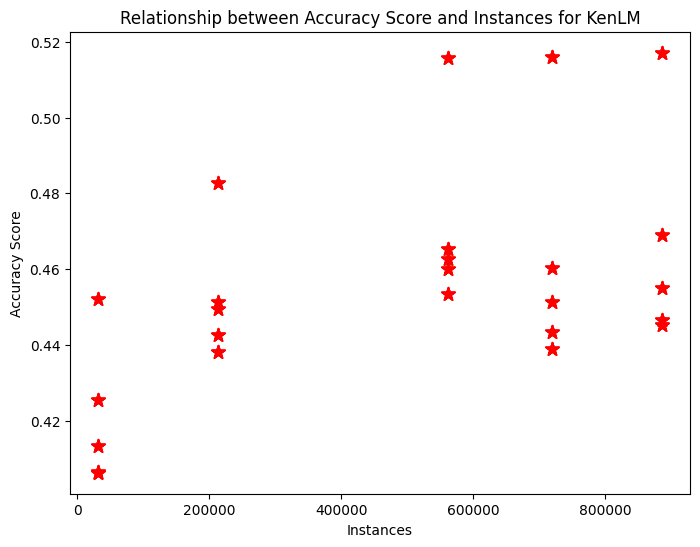

In [46]:
# Data for recall score and instances
accuracy_data = [
    df_kenlm_10_projects['accuracy'],
    df_kenlm_50_projects['accuracy'],
    df_kenlm_100_projects['accuracy'],
    df_kenlm_150_projects['accuracy'],
    df_kenlm_500_projects['accuracy']
]

# Corresponding instance counts, repeated 25 times to match the length of each recall data set
instances = [32054] * 25 + [212971] * 25 + [561321] * 25 + [719366] * 25 + [885995] * 25

# Flatten recall_data list to get all data points in a single list
recall_scores = [score for dataset in accuracy_data for score in dataset]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(instances,recall_scores,color='red', marker='*', s=100)  # s=100 for marker size

# Labels and title
plt.xlabel("Instances")
plt.ylabel("Accuracy Score")
plt.title("Relationship between Accuracy Score and Instances for KenLM")

# Save as PDF
plt.savefig("/content/plot_results/accuracy_score_vs_instances_plot_kenlm.pdf")
plt.show()